(50, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB
None
        Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
count         50.000000         50.000000          50.000000        50.000000   
unique              NaN               NaN                NaN              NaN   
top                 NaN               NaN                NaN              NaN   
freq                NaN  

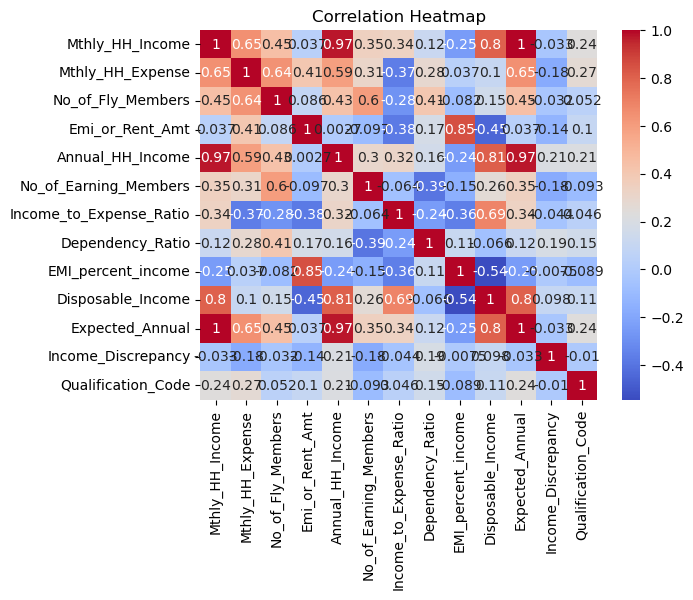

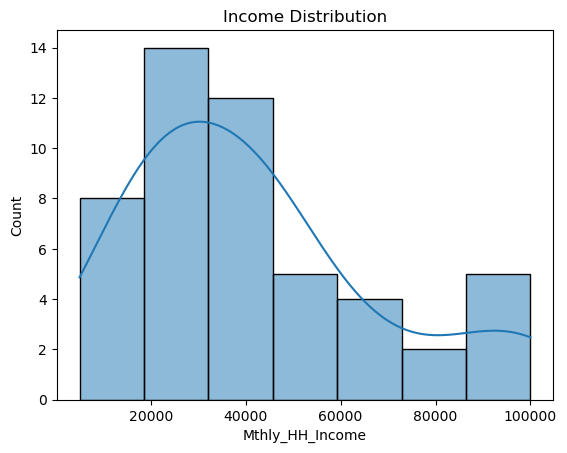

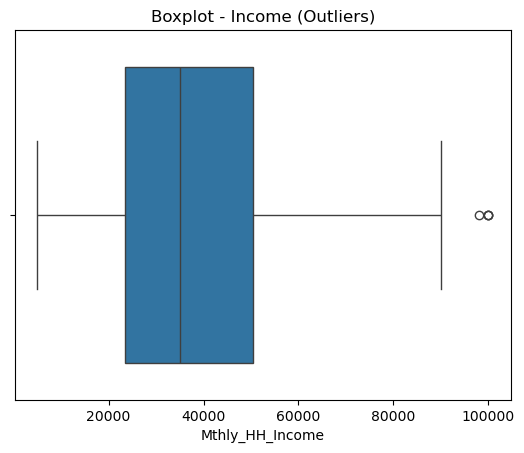

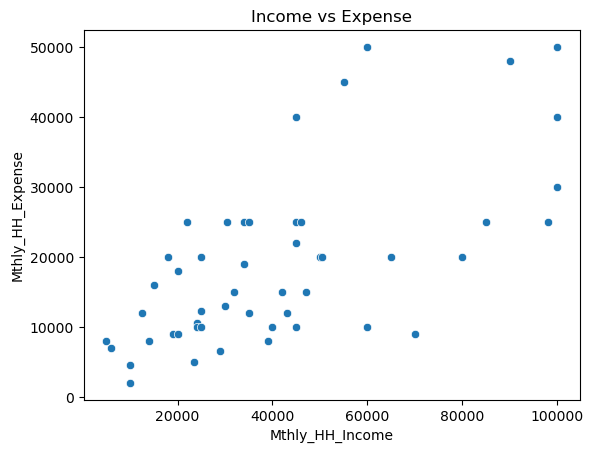

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("Inc_Exp_Data.csv")

print(df.shape)
print(df.info())
print(df.describe(include="all"))


print("\n--- Income & Expenditure ---")
mean_income = df["Mthly_HH_Income"].mean()
median_income = df["Mthly_HH_Income"].median()
mode_income = df["Mthly_HH_Income"].mode()[0]

print("Mean Income:", mean_income)
print("Median Income:", median_income)
print("Mode Income:", mode_income)

mean_exp = df["Mthly_HH_Expense"].mean()
median_exp = df["Mthly_HH_Expense"].median()
print("Mean Expense:", mean_exp)
print("Median Expense:", median_exp)
if mean_exp > median_exp:
    print("Expenditure distribution is right-skewed (a few households spend much more).")
else:
    print("Expenditure distribution is balanced or left-skewed.")

income_range = df["Mthly_HH_Income"].max() - df["Mthly_HH_Income"].min()
print("Range of Income:", income_range)

df["Income_to_Expense_Ratio"] = df["Mthly_HH_Income"] / df["Mthly_HH_Expense"]
highest_ratio = df.loc[df["Income_to_Expense_Ratio"].idxmax()]
print("Household with highest income-to-expense ratio:\n", highest_ratio)

print("\n--- Family Structure ---")
avg_family = df["No_of_Fly_Members"].mean()
print("Average family size:", avg_family)

std_family = df["No_of_Fly_Members"].std()
print("Standard Deviation of family size:", std_family)

df["Dependency_Ratio"] = (df["No_of_Fly_Members"] - df["No_of_Earning_Members"]) / df["No_of_Fly_Members"]
highest_dependency = df.loc[df["Dependency_Ratio"].idxmax()]
print("Household with highest dependency ratio:\n", highest_dependency)

print("\n--- Housing & EMI ---")
df["EMI_percent_income"] = (df["Emi_or_Rent_Amt"] / df["Mthly_HH_Income"]) * 100
print("Average EMI % of income:", df["EMI_percent_income"].mean())

high_emi = df[df["EMI_percent_income"] > 40]
print("Households with EMI > 40% income:\n", high_emi)

df["Disposable_Income"] = df["Mthly_HH_Income"] - df["Mthly_HH_Expense"] - df["Emi_or_Rent_Amt"]
lowest_disposable = df.loc[df["Disposable_Income"].idxmin()]
print("Household with lowest disposable income:\n", lowest_disposable)

print("\n--- Annual Income & Qualification ---")
df["Expected_Annual"] = df["Mthly_HH_Income"] * 12
df["Income_Discrepancy"] = df["Annual_HH_Income"] - df["Expected_Annual"]
discrepancies = df[df["Income_Discrepancy"] != 0]
print("Households with mismatch in annual vs monthly*12:\n", discrepancies)

edu_map = {
    "Under-Graduate": 1,
    "Graduate": 2,
    "Postgraduate": 3,
    "PhD": 4
}
df["Qualification_Code"] = df["Highest_Qualified_Member"].map(edu_map)

group_income = df.groupby("Highest_Qualified_Member")["Mthly_HH_Income"].mean()
print("Average Monthly Income by Qualification:\n", group_income)

group_median = df.groupby("Highest_Qualified_Member")["Mthly_HH_Income"].median()
print("Median Monthly Income by Qualification:\n", group_median)

print("\n--- Outliers & Correlation ---")
z_scores = np.abs(stats.zscore(df["Mthly_HH_Income"]))
outliers = df[z_scores > 3]
print("Outliers in Monthly Income:\n", outliers)

corr_income_exp = df["Mthly_HH_Income"].corr(df["Mthly_HH_Expense"])
print("Correlation between Income & Expense:", corr_income_exp)

corr_earning_income = df["No_of_Earning_Members"].corr(df["Mthly_HH_Income"])
print("Correlation between Earning Members & Income:", corr_earning_income)

# Heatmap of numeric correlations
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.histplot(df["Mthly_HH_Income"], kde=True)
plt.title("Income Distribution")
plt.show()

sns.boxplot(x=df["Mthly_HH_Income"])
plt.title("Boxplot - Income (Outliers)")
plt.show()

sns.scatterplot(x="Mthly_HH_Income", y="Mthly_HH_Expense", data=df)
plt.title("Income vs Expense")
plt.show()